In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

<h3>Combining data from several DataFrames</h3>

In [3]:
df1 = pd.DataFrame({'ID':[1,2,3,5,9],
                    'Col_1':[1,2,3,4,5],
                    'Col_2':[6,7,8,9,10],
                    'Col_3':[11,12,13,14,15],
                    'Col_4':['apple','orange','banana','strawberry','raspberry']
                    })

df2 = pd.DataFrame({'ID':[1,1,3,5],
                    'Col_A':[8,9,10,11],
                    'Col_B':[12,13,15,17],
                    'Col_4':['apple','orange','banana','kiwi']
                   })

# Let's create two DataFrames with several common columns

In [4]:
df1

,ID,Col_1,Col_2,Col_3,Col_4
0,1,1,6,11,apple
1,2,2,7,12,orange
2,3,3,8,13,banana
3,5,4,9,14,strawberry
4,9,5,10,15,raspberry


In [5]:
df2

,ID,Col_A,Col_B,Col_4
0,1,8,12,apple
1,1,9,13,orange
2,3,10,15,banana
3,5,11,17,kiwi


In [6]:
pd.merge(df1, df2)

# The first way to merge data from two DataFrames is the merge function
# It is analogous to the join statement in SQL
# By default, data is grouped by columns with the same names
# Documentation: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.merge.html

,ID,Col_1,Col_2,Col_3,Col_4,Col_A,Col_B
0,1,1,6,11,apple,8,12
1,3,3,8,13,banana,10,15


In [7]:
pd.merge(df1, df2, on='ID')
# Specify the field on which the merge will take place

,ID,Col_1,Col_2,Col_3,Col_4_x,Col_A,Col_B,Col_4_y
0,1,1,6,11,apple,8,12,apple
1,1,1,6,11,apple,9,13,orange
2,3,3,8,13,banana,10,15,banana
3,5,4,9,14,strawberry,11,17,kiwi


In [8]:
pd.merge(df1, df2, on=['ID','Col_4'])
# We specify several fields on which the merge will take place

,ID,Col_1,Col_2,Col_3,Col_4,Col_A,Col_B
0,1,1,6,11,apple,8,12
1,3,3,8,13,banana,10,15


In [9]:
pd.merge(df1, df2, suffixes=['_l','_r'], left_on='Col_2', right_on='Col_A')
# Specify the fields for the left and right tables separately
# Specify suffixes for columns with the same names

,ID_l,Col_1,Col_2,Col_3,Col_4_l,ID_r,Col_A,Col_B,Col_4_r
0,3,3,8,13,banana,1,8,12,apple
1,5,4,9,14,strawberry,1,9,13,orange
2,9,5,10,15,raspberry,3,10,15,banana


In [10]:
pd.merge(df1, df2, suffixes=['_l','_r'], left_index=True, right_index=True)
# Combine tables by index

,ID_l,Col_1,Col_2,Col_3,Col_4_l,ID_r,Col_A,Col_B,Col_4_r
0,1,1,6,11,apple,1,8,12,apple
1,2,2,7,12,orange,1,9,13,orange
2,3,3,8,13,banana,3,10,15,banana
3,5,4,9,14,strawberry,5,11,17,kiwi


In [11]:
pd.merge(df1, df2, on='ID', how='outer')
# External merge - similar to SQL outer join

,ID,Col_1,Col_2,Col_3,Col_4_x,Col_A,Col_B,Col_4_y
0,1,1,6,11,apple,8.0,12.0,apple
1,1,1,6,11,apple,9.0,13.0,orange
2,2,2,7,12,orange,NaN,NaN,NaN
3,3,3,8,13,banana,10.0,15.0,banana
4,5,4,9,14,strawberry,11.0,17.0,kiwi
5,9,5,10,15,raspberry,NaN,NaN,NaN


In [12]:
pd.merge(df1, df2, on='ID', how='left')
# Left merge - similar to SQL left join

,ID,Col_1,Col_2,Col_3,Col_4_x,Col_A,Col_B,Col_4_y
0,1,1,6,11,apple,8.0,12.0,apple
1,1,1,6,11,apple,9.0,13.0,orange
2,2,2,7,12,orange,NaN,NaN,NaN
3,3,3,8,13,banana,10.0,15.0,banana
4,5,4,9,14,strawberry,11.0,17.0,kiwi
5,9,5,10,15,raspberry,NaN,NaN,NaN


In [13]:
df1.join(df2, on='ID', lsuffix='_l',rsuffix='_r')
# join does the same thing as merge, but with fewer settings
# join is a method, not a function
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.join.html

,ID_l,Col_1,Col_2,Col_3,Col_4_l,ID_r,Col_A,Col_B,Col_4_r
0,1,1,6,11,apple,1.0,9.0,13.0,orange
1,2,2,7,12,orange,3.0,10.0,15.0,banana
2,3,3,8,13,banana,5.0,11.0,17.0,kiwi
3,5,4,9,14,strawberry,NaN,NaN,NaN,NaN
4,9,5,10,15,raspberry,NaN,NaN,NaN,NaN


In [14]:
df1.join(df2, on='ID', how='inner', lsuffix='_l',rsuffix='_r')
# inner join

,ID,ID_l,Col_1,Col_2,Col_3,Col_4_l,ID_r,Col_A,Col_B,Col_4_r
0,1,1,1,6,11,apple,1,9,13,orange
1,2,2,2,7,12,orange,3,10,15,banana
2,3,3,3,8,13,banana,5,11,17,kiwi


In [15]:
df1.join(df2, on='ID', how='left', lsuffix='_l',rsuffix='_r')
# left join

,ID_l,Col_1,Col_2,Col_3,Col_4_l,ID_r,Col_A,Col_B,Col_4_r
0,1,1,6,11,apple,1.0,9.0,13.0,orange
1,2,2,7,12,orange,3.0,10.0,15.0,banana
2,3,3,8,13,banana,5.0,11.0,17.0,kiwi
3,5,4,9,14,strawberry,NaN,NaN,NaN,NaN
4,9,5,10,15,raspberry,NaN,NaN,NaN,NaN


In [16]:
pd.concat([df1, df2])
# Combining all data from two tables
# https://pandas.pydata.org/docs/reference/api/pandas.concat.html

,ID,Col_1,Col_2,Col_3,Col_4,Col_A,Col_B
0,1,1.0,6.0,11.0,apple,NaN,NaN
1,2,2.0,7.0,12.0,orange,NaN,NaN
2,3,3.0,8.0,13.0,banana,NaN,NaN
3,5,4.0,9.0,14.0,strawberry,NaN,NaN
4,9,5.0,10.0,15.0,raspberry,NaN,NaN
0,1,NaN,NaN,NaN,apple,8.0,12.0
1,1,NaN,NaN,NaN,orange,9.0,13.0
2,3,NaN,NaN,NaN,banana,10.0,15.0
3,5,NaN,NaN,NaN,kiwi,11.0,17.0


In [17]:
pd.concat([df1, df2], ignore_index=True)
# Reset the index after merging
# Works like a union in SQL, but has fewer restrictions

,ID,Col_1,Col_2,Col_3,Col_4,Col_A,Col_B
0,1,1.0,6.0,11.0,apple,NaN,NaN
1,2,2.0,7.0,12.0,orange,NaN,NaN
2,3,3.0,8.0,13.0,banana,NaN,NaN
3,5,4.0,9.0,14.0,strawberry,NaN,NaN
4,9,5.0,10.0,15.0,raspberry,NaN,NaN
5,1,NaN,NaN,NaN,apple,8.0,12.0
6,1,NaN,NaN,NaN,orange,9.0,13.0
7,3,NaN,NaN,NaN,banana,10.0,15.0
8,5,NaN,NaN,NaN,kiwi,11.0,17.0


In [18]:
pd.concat([df1, df2], axis=1)
# Adding columns instead of rows
# usually, it's better to use merge for this

,ID,Col_1,Col_2,Col_3,Col_4,ID,Col_A,Col_B,Col_4
0,1,1,6,11,apple,1.0,8.0,12.0,apple
1,2,2,7,12,orange,1.0,9.0,13.0,orange
2,3,3,8,13,banana,3.0,10.0,15.0,banana
3,5,4,9,14,strawberry,5.0,11.0,17.0,kiwi
4,9,5,10,15,raspberry,NaN,NaN,NaN,NaN


<h3>Summary tables</h3>

In [20]:
df = pd.read_csv(r"C:\Users\Ali\Documents\python\survey_results_public.csv")
df
# Let's download the already familiar dataset with the results of the Stackoverflow survey

,ResponseId,Q120,MainBranch,Age,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,ProfessionalTech,Industry,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,I agree,None of these,18-24 years old,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I agree,I am a developer by profession,25-34 years old,"Employed, full-time",Remote,Hobby;Contribute to open-source projects;Boots...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;Friend or fam...,Formal documentation provided by the owner of ...,...,1-2 times a week,10+ times a week,Never,15-30 minutes a day,15-30 minutes a day,DevOps function;Microservices;Automated testin...,"Information Services, IT, Software Development...",Appropriate in length,Easy,285000.0
2,3,I agree,I am a developer by profession,45-54 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby;Professional development or self-paced l...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Formal documentation provided by the owner of ...,...,6-10 times a week,6-10 times a week,3-5 times a week,30-60 minutes a day,30-60 minutes a day,DevOps function;Microservices;Automated testin...,"Information Services, IT, Software Development...",Appropriate in length,Easy,250000.0
3,4,I agree,I am a developer by profession,25-34 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Colleague;Friend or family member;Other online...,Formal documentation provided by the owner of ...,...,1-2 times a week,10+ times a week,1-2 times a week,15-30 minutes a day,30-60 minutes a day,Automated testing;Continuous integration (CI) ...,NaN,Appropriate in length,Easy,156000.0
4,5,I agree,I am a developer by profession,25-34 years old,"Employed, full-time;Independent contractor, fr...",Remote,Hobby;Contribute to open-source projects;Profe...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Online Courses or Certi...,Formal documentation provided by the owner of ...,...,1-2 times a week,1-2 times a week,3-5 times a week,60-120 minutes a day,30-60 minutes a day,Microservices;Automated testing;Observability ...,Other,Appropriate in length,Neither easy nor difficult,23456.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89179,89180,I agree,I am a developer by profession,25-34 years old,"Employed, full-time;Independent contractor, fr...",Remote,Hobby;Bootstrapping a business;Freelance/contr...,"Associate degree (A.A., A.S., etc.)",Online Courses or Certification;Other online r...,Formal documentation provided by the owner of ...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Neither easy nor difficult,NaN
89180,89181,I agree,I am a developer by profession,18-24 years old,"Student, full-time;Employed, part-time","Hybrid (some remote, some in-person)",School or academic work,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Colleague;Online Courses or Certification;Othe...,Formal documentation provided by the owner of ...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN
89181,89182,I agree,I code primarily as a hobby,Prefer not to say,I prefer not to say,NaN,NaN,Something else,Books / Physical media;Hackathons (virtual or ...,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Neither easy nor difficult,NaN
89182,89183,I agree,I am a developer by profession,Under 18 years old,"Employed, part-time;Student, part-time","Hybrid (some remote, some in-person)",Hobby;School or academic work,"Secondary school (e.g. American high school, G...",Online Courses or Certification;Other online r...,Formal documentation provided by the owner of ...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Neither easy nor difficult,NaN


In [21]:
dfp = df.pivot_table(index='Industry', columns='RemoteWork', values='ConvertedCompYearly', aggfunc=np.mean)
dfp
# Pandas allows you to create pivot tables using the same principle as MS Excel or Google Sheets
# Let's define rows, columns, values ​​and aggregation
# Note that one of the arguments of this method is a function

RemoteWork,"Hybrid (some remote, some in-person)",In-person,Remote
Industry,,,
Advertising Services,111253.818182,92037.163934,118059.633540
Financial Services,141774.783699,90478.501362,113122.255074
Healthcare,90572.272590,69786.770115,120466.587486
Higher Education,71734.458015,54624.260870,86431.578947
"Information Services, IT, Software Development, or other Technology",97853.381956,58725.490110,103088.492116
Insurance,79140.384615,210505.461538,106415.603053
Legal Services,89528.939394,36527.916667,94236.813187
"Manufacturing, Transportation, or Supply Chain",95708.629319,67075.538298,99358.951220
Oil & Gas,96125.627660,82797.195122,84348.084507


<Axes: xlabel='RemoteWork', ylabel='Industry'>

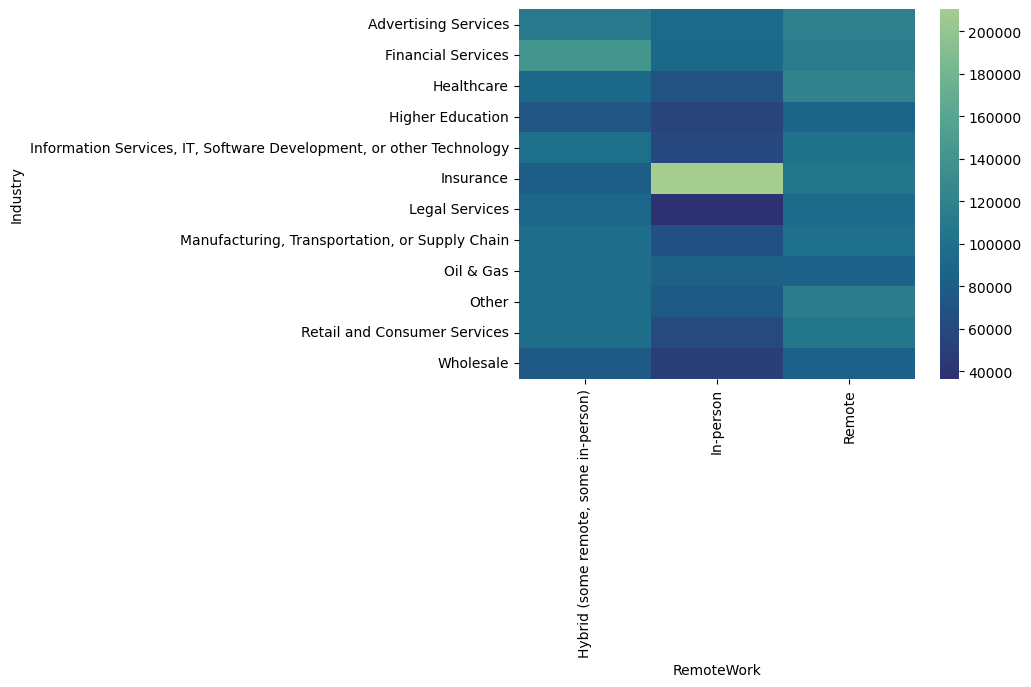

In [22]:
sns.heatmap(data=dfp, cmap= 'crest_r')
# We can use the table obtained as a result, for example, to build a heat map.
# In which industries and in which work model are the highest salaries?

<h3>Lambda functions and the apply() method</h3>

In [24]:
dfp['Remote']
# If we use np.mean() aggregation, by default, we get unrounded numbers with dtype: float64
# What can we do differently if we need, for example, to export data with 2 decimal places?

Industry
Advertising Services                                                   118059.633540
Financial Services                                                     113122.255074
Healthcare                                                             120466.587486
Higher Education                                                        86431.578947
Information Services, IT, Software Development, or other Technology    103088.492116
Insurance                                                              106415.603053
Legal Services                                                          94236.813187
Manufacturing, Transportation, or Supply Chain                          99358.951220
Oil & Gas                                                               84348.084507
Other                                                                  114206.274415
Retail and Consumer Services                                           107105.090418
Wholesale                                               

In [25]:
df.pivot_table(index='Industry', columns='RemoteWork', values='ConvertedCompYearly', aggfunc=np.round(np.mean, 2))
# And we cannot use several functions as an argument at once

TypeError: unsupported operand type(s) for *: 'function' and 'float'

In [28]:
def round_mean(x):
    return np.round(np.mean(x), 2)

df.pivot_table(index='Industry', columns='RemoteWork', values='ConvertedCompYearly', aggfunc=round_mean)
# We can create a function and pass it as an argument

RemoteWork,"Hybrid (some remote, some in-person)",In-person,Remote
Industry,,,
Advertising Services,111253.82,92037.16,118059.63
Financial Services,141774.78,90478.50,113122.26
Healthcare,90572.27,69786.77,120466.59
Higher Education,71734.46,54624.26,86431.58
"Information Services, IT, Software Development, or other Technology",97853.38,58725.49,103088.49
Insurance,79140.38,210505.46,106415.60
Legal Services,89528.94,36527.92,94236.81
"Manufacturing, Transportation, or Supply Chain",95708.63,67075.54,99358.95
Oil & Gas,96125.63,82797.20,84348.08


In [30]:
lambda_round_mean = lambda x: np.round(np.mean(x), 2)

df.pivot_table(index='Industry', columns='RemoteWork', values='ConvertedCompYearly', aggfunc=lambda_round_mean)
# We can create a function with simplified syntax

RemoteWork,"Hybrid (some remote, some in-person)",In-person,Remote
Industry,,,
Advertising Services,111253.82,92037.16,118059.63
Financial Services,141774.78,90478.50,113122.26
Healthcare,90572.27,69786.77,120466.59
Higher Education,71734.46,54624.26,86431.58
"Information Services, IT, Software Development, or other Technology",97853.38,58725.49,103088.49
Insurance,79140.38,210505.46,106415.60
Legal Services,89528.94,36527.92,94236.81
"Manufacturing, Transportation, or Supply Chain",95708.63,67075.54,99358.95
Oil & Gas,96125.63,82797.20,84348.08


In [32]:
df.pivot_table(index='Industry', columns='RemoteWork', values='ConvertedCompYearly', aggfunc=lambda x: np.round(np.mean(x), 2))
# We can specify the lambda function directly in place of the value of the corresponding argument

RemoteWork,"Hybrid (some remote, some in-person)",In-person,Remote
Industry,,,
Advertising Services,111253.82,92037.16,118059.63
Financial Services,141774.78,90478.50,113122.26
Healthcare,90572.27,69786.77,120466.59
Higher Education,71734.46,54624.26,86431.58
"Information Services, IT, Software Development, or other Technology",97853.38,58725.49,103088.49
Insurance,79140.38,210505.46,106415.60
Legal Services,89528.94,36527.92,94236.81
"Manufacturing, Transportation, or Supply Chain",95708.63,67075.54,99358.95
Oil & Gas,96125.63,82797.20,84348.08


In [34]:
dfp
# And what to do if we have already created a non-rounded table?

RemoteWork,"Hybrid (some remote, some in-person)",In-person,Remote
Industry,,,
Advertising Services,111253.818182,92037.163934,118059.633540
Financial Services,141774.783699,90478.501362,113122.255074
Healthcare,90572.272590,69786.770115,120466.587486
Higher Education,71734.458015,54624.260870,86431.578947
"Information Services, IT, Software Development, or other Technology",97853.381956,58725.490110,103088.492116
Insurance,79140.384615,210505.461538,106415.603053
Legal Services,89528.939394,36527.916667,94236.813187
"Manufacturing, Transportation, or Supply Chain",95708.629319,67075.538298,99358.951220
Oil & Gas,96125.627660,82797.195122,84348.084507


In [36]:
dfp['Remote'].apply(np.round)
# We can apply the function to each cell using the apply() method

Industry
Advertising Services                                                   118060.0
Financial Services                                                     113122.0
Healthcare                                                             120467.0
Higher Education                                                        86432.0
Information Services, IT, Software Development, or other Technology    103088.0
Insurance                                                              106416.0
Legal Services                                                          94237.0
Manufacturing, Transportation, or Supply Chain                          99359.0
Oil & Gas                                                               84348.0
Other                                                                  114206.0
Retail and Consumer Services                                           107105.0
Wholesale                                                               83546.0
Name: Remote, dtype: float64

In [38]:
dfp['Remote'].apply(np.round(, 2))
# But the function in argument cannot take arguments

SyntaxError: invalid syntax (855812230.py, line 1)

In [40]:
dfp['Remote'].apply(lambda x: np.round(x, 2))
# In this case, we can again refer to the lambda function

Industry
Advertising Services                                                   118059.63
Financial Services                                                     113122.26
Healthcare                                                             120466.59
Higher Education                                                        86431.58
Information Services, IT, Software Development, or other Technology    103088.49
Insurance                                                              106415.60
Legal Services                                                          94236.81
Manufacturing, Transportation, or Supply Chain                          99358.95
Oil & Gas                                                               84348.08
Other                                                                  114206.27
Retail and Consumer Services                                           107105.09
Wholesale                                                               83546.17
Name: Remote, dtype

In [42]:
dfp[['Hybrid (some remote, some in-person)', 'In-person', 'Remote']].apply(lambda x: np.round(x, 2))
# Apply a function to multiple columns in a table

RemoteWork,"Hybrid (some remote, some in-person)",In-person,Remote
Industry,,,
Advertising Services,111253.82,92037.16,118059.63
Financial Services,141774.78,90478.50,113122.26
Healthcare,90572.27,69786.77,120466.59
Higher Education,71734.46,54624.26,86431.58
"Information Services, IT, Software Development, or other Technology",97853.38,58725.49,103088.49
Insurance,79140.38,210505.46,106415.60
Legal Services,89528.94,36527.92,94236.81
"Manufacturing, Transportation, or Supply Chain",95708.63,67075.54,99358.95
Oil & Gas,96125.63,82797.20,84348.08


<h3>Working with dates and times</h3>

In [45]:
df = pd.read_csv(r"C:\Users\Ali\Documents\python\dou_2023_june_raw.csv", sep=';')
df
# Let's take the salary survey from DOU

,Timestamp,Ваша основна зайнятість в ІТ зараз...,"Зарплата / дохід у $$$ за місяць, лише ставка після сплати податків",Спеціалізація,Ваш тайтл на цій посаді,Вкажіть вашу спеціалізацію Game Design,Вкажіть вашу спеціалізацію Sound,Вкажіть вашу спеціалізацію - QA,Оберіть вашу посаду Designer / Artist,"Якщо ви працюєте в GameDev, оберіть вашу спеціалізацію",...,"В якій сфері проєкт, в якому ви зараз працюєте?","Основний напрям роботи компанії, в якій працюєте",Кількість спеціалістів у вашій компанії (в Україні/з України),Загальний стаж роботи за нинішньою ІТ-спеціальністю,Яка у вас освіта?,Знання англійської мови,Де ви зараз живете?,В якій області ви зараз живете?,Ваша стать,Ваш вік
0,5.26.2023 13:40:35,Працюю full-time в ІТ-компанії чи ІТ-відділі,2300,"Marketing, PR, SEO, Copywriter",Senior,NaN,NaN,NaN,NaN,NaN,...,Інша,Аутсорсингова,до 200,4,"Вища (бакалавр, спеціаліст, магістр) - одна аб...",Advanced,В Україні,Київ чи область,Чоловік,28
1,5.26.2023 13:40:36,Працюю full-time в ІТ-компанії чи ІТ-відділі,3450,Software Engineer,Middle,NaN,NaN,NaN,NaN,NaN,...,Medtech / Healthcare,Аутсорсингова,понад 1000,4,"Вища (бакалавр, спеціаліст, магістр) - одна аб...",Pre-Intermediate,В Україні,Київ чи область,Чоловік,28
2,5.26.2023 13:41:02,Працюю full-time в ІТ-компанії чи ІТ-відділі,900,"Marketing, PR, SEO, Copywriter",Team Lead,NaN,NaN,NaN,NaN,NaN,...,E-commerce,Продуктова,до 200,5,"Вища (бакалавр, спеціаліст, магістр) - одна аб...",Upper-Intermediate,В Україні,Миколаїв чи область,Жінка,27
3,5.26.2023 13:41:19,Працюю full-time в ІТ-компанії чи ІТ-відділі,4000,Software Engineer,Middle,NaN,NaN,NaN,NaN,NaN,...,E-commerce,Аутстафінгова,понад 1000,5,"Вища (бакалавр, спеціаліст, магістр) - одна аб...",Upper-Intermediate,В Україні,Суми чи область,Чоловік,27
4,5.26.2023 13:41:34,Працюю full-time в ІТ-компанії чи ІТ-відділі,2700,"Analyst (Business, Data, System etc)",Middle,NaN,NaN,NaN,NaN,NaN,...,Medtech / Healthcare,Продуктова,до 1000,3,"Вища (бакалавр, спеціаліст, магістр) - одна аб...",Upper-Intermediate,В Україні,Київ чи область,Жінка,27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14054,6.26.2023 13:27:47,Працюю full-time в ІТ-компанії чи ІТ-відділі,1850,HR/Recruiter/Learning and Development,Немає тайтлу,NaN,NaN,NaN,NaN,NaN,...,"Cloud Computing, Manufacturing, Media",Продуктова,до 1000,7,"Вища (бакалавр, спеціаліст, магістр) - одна аб...",Upper-Intermediate,В Україні,Київ чи область,Жінка,29
14055,6.26.2023 13:28:38,Працюю full-time в ІТ-компанії чи ІТ-відділі,700,"Designer / Artist (Graphic, Video, UX/UI)",Middle,NaN,NaN,NaN,2D Artist,NaN,...,"GameDev, Mobile",Продуктова,до 50,1,"Вища (бакалавр, спеціаліст, магістр) - одна аб...",Upper-Intermediate,В Україні,Дніпро чи область,Жінка,21
14056,6.26.2023 13:42:22,Працюю full-time в ІТ-компанії чи ІТ-відділі,3000,"QA / AQA Engineer (Junior, Middle, Senior, Tea...",Senior,NaN,NaN,Manual QA,NaN,NaN,...,"Blockchain, GameDev",Стартап,до 200,4,Середня,Intermediate,В Україні,Львів чи область,Чоловік,25
14057,6.26.2023 13:48:00,Працюю full-time в ІТ-компанії чи ІТ-відділі,3000,Software Engineer,Middle,NaN,NaN,NaN,NaN,NaN,...,Adtech / Advertising,Аутсорсингова,до 1000,5,"Вища (бакалавр, спеціаліст, магістр) - одна аб...",Pre-Intermediate,В Україні,Полтава чи область,Чоловік,28


In [47]:
df['Timestamp']
# The date field, by default, has the "object" type

0        5.26.2023 13:40:35
1        5.26.2023 13:40:36
2        5.26.2023 13:41:02
3        5.26.2023 13:41:19
4        5.26.2023 13:41:34
                ...        
14054    6.26.2023 13:27:47
14055    6.26.2023 13:28:38
14056    6.26.2023 13:42:22
14057    6.26.2023 13:48:00
14058    6.26.2023 13:53:18
Name: Timestamp, Length: 14059, dtype: object

In [50]:
df['Timestamp'].dt.day_name()
# We cannot apply a datetime method to a field of this type

AttributeError: Can only use .dt accessor with datetimelike values

In [52]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
# We can convert text to datetime

In [56]:
df = pd.read_csv(r"C:\Users\Ali\Documents\python\dou_2023_june_raw.csv", sep=';', parse_dates=['Timestamp'])
df
# You can also specify date and time fields when reading a file

,Timestamp,Ваша основна зайнятість в ІТ зараз...,"Зарплата / дохід у $$$ за місяць, лише ставка після сплати податків",Спеціалізація,Ваш тайтл на цій посаді,Вкажіть вашу спеціалізацію Game Design,Вкажіть вашу спеціалізацію Sound,Вкажіть вашу спеціалізацію - QA,Оберіть вашу посаду Designer / Artist,"Якщо ви працюєте в GameDev, оберіть вашу спеціалізацію",...,"В якій сфері проєкт, в якому ви зараз працюєте?","Основний напрям роботи компанії, в якій працюєте",Кількість спеціалістів у вашій компанії (в Україні/з України),Загальний стаж роботи за нинішньою ІТ-спеціальністю,Яка у вас освіта?,Знання англійської мови,Де ви зараз живете?,В якій області ви зараз живете?,Ваша стать,Ваш вік
0,2023-05-26 13:40:35,Працюю full-time в ІТ-компанії чи ІТ-відділі,2300,"Marketing, PR, SEO, Copywriter",Senior,NaN,NaN,NaN,NaN,NaN,...,Інша,Аутсорсингова,до 200,4,"Вища (бакалавр, спеціаліст, магістр) - одна аб...",Advanced,В Україні,Київ чи область,Чоловік,28
1,2023-05-26 13:40:36,Працюю full-time в ІТ-компанії чи ІТ-відділі,3450,Software Engineer,Middle,NaN,NaN,NaN,NaN,NaN,...,Medtech / Healthcare,Аутсорсингова,понад 1000,4,"Вища (бакалавр, спеціаліст, магістр) - одна аб...",Pre-Intermediate,В Україні,Київ чи область,Чоловік,28
2,2023-05-26 13:41:02,Працюю full-time в ІТ-компанії чи ІТ-відділі,900,"Marketing, PR, SEO, Copywriter",Team Lead,NaN,NaN,NaN,NaN,NaN,...,E-commerce,Продуктова,до 200,5,"Вища (бакалавр, спеціаліст, магістр) - одна аб...",Upper-Intermediate,В Україні,Миколаїв чи область,Жінка,27
3,2023-05-26 13:41:19,Працюю full-time в ІТ-компанії чи ІТ-відділі,4000,Software Engineer,Middle,NaN,NaN,NaN,NaN,NaN,...,E-commerce,Аутстафінгова,понад 1000,5,"Вища (бакалавр, спеціаліст, магістр) - одна аб...",Upper-Intermediate,В Україні,Суми чи область,Чоловік,27
4,2023-05-26 13:41:34,Працюю full-time в ІТ-компанії чи ІТ-відділі,2700,"Analyst (Business, Data, System etc)",Middle,NaN,NaN,NaN,NaN,NaN,...,Medtech / Healthcare,Продуктова,до 1000,3,"Вища (бакалавр, спеціаліст, магістр) - одна аб...",Upper-Intermediate,В Україні,Київ чи область,Жінка,27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14054,2023-06-26 13:27:47,Працюю full-time в ІТ-компанії чи ІТ-відділі,1850,HR/Recruiter/Learning and Development,Немає тайтлу,NaN,NaN,NaN,NaN,NaN,...,"Cloud Computing, Manufacturing, Media",Продуктова,до 1000,7,"Вища (бакалавр, спеціаліст, магістр) - одна аб...",Upper-Intermediate,В Україні,Київ чи область,Жінка,29
14055,2023-06-26 13:28:38,Працюю full-time в ІТ-компанії чи ІТ-відділі,700,"Designer / Artist (Graphic, Video, UX/UI)",Middle,NaN,NaN,NaN,2D Artist,NaN,...,"GameDev, Mobile",Продуктова,до 50,1,"Вища (бакалавр, спеціаліст, магістр) - одна аб...",Upper-Intermediate,В Україні,Дніпро чи область,Жінка,21
14056,2023-06-26 13:42:22,Працюю full-time в ІТ-компанії чи ІТ-відділі,3000,"QA / AQA Engineer (Junior, Middle, Senior, Tea...",Senior,NaN,NaN,Manual QA,NaN,NaN,...,"Blockchain, GameDev",Стартап,до 200,4,Середня,Intermediate,В Україні,Львів чи область,Чоловік,25
14057,2023-06-26 13:48:00,Працюю full-time в ІТ-компанії чи ІТ-відділі,3000,Software Engineer,Middle,NaN,NaN,NaN,NaN,NaN,...,Adtech / Advertising,Аутсорсингова,до 1000,5,"Вища (бакалавр, спеціаліст, магістр) - одна аб...",Pre-Intermediate,В Україні,Полтава чи область,Чоловік,28


In [58]:
df['Timestamp'].dt.day_name()
# Now we can apply a method to work with the date and time

0        Friday
1        Friday
2        Friday
3        Friday
4        Friday
          ...  
14054    Monday
14055    Monday
14056    Monday
14057    Monday
14058    Monday
Name: Timestamp, Length: 14059, dtype: object

In [60]:
print(df['Timestamp'].min())
print(df['Timestamp'].max())
# check when the first and last filling of the survey took place

2023-05-26 13:40:35
2023-06-26 13:53:18


In [64]:
dt_filter = (df['Timestamp'] >= pd.to_datetime('2023-06-01')) & (df['Timestamp'] <= pd.to_datetime('2023-06-16'))

df.loc[dt_filter]
# We will filter only those who filled out the survey in the first half of June

,Timestamp,Ваша основна зайнятість в ІТ зараз...,"Зарплата / дохід у $$$ за місяць, лише ставка після сплати податків",Спеціалізація,Ваш тайтл на цій посаді,Вкажіть вашу спеціалізацію Game Design,Вкажіть вашу спеціалізацію Sound,Вкажіть вашу спеціалізацію - QA,Оберіть вашу посаду Designer / Artist,"Якщо ви працюєте в GameDev, оберіть вашу спеціалізацію",...,"В якій сфері проєкт, в якому ви зараз працюєте?","Основний напрям роботи компанії, в якій працюєте",Кількість спеціалістів у вашій компанії (в Україні/з України),Загальний стаж роботи за нинішньою ІТ-спеціальністю,Яка у вас освіта?,Знання англійської мови,Де ви зараз живете?,В якій області ви зараз живете?,Ваша стать,Ваш вік
5313,2023-06-01 00:00:00,Працюю full-time в ІТ-компанії чи ІТ-відділі,25000,"СTO, Director of Engineering, Program Director...",Немає тайтлу,NaN,NaN,NaN,NaN,NaN,...,Dating,Продуктова,до 200,10,"Вища (бакалавр, спеціаліст, магістр) - одна аб...",Advanced,В Україні,Київ чи область,Чоловік,33
5314,2023-06-01 00:00:15,Працюю full-time в ІТ-компанії чи ІТ-відділі,5500,Software Engineer,Senior,NaN,NaN,NaN,NaN,NaN,...,Інша,Аутсорсингова,понад 1000,6,"Вища (бакалавр, спеціаліст, магістр) - одна аб...",Advanced,"За кордоном (переїхали через війну, але планую...",NaN,Жінка,24
5315,2023-06-01 00:02:48,Працюю full-time в ІТ-компанії чи ІТ-відділі,4500,Software Engineer,Tech Lead,NaN,NaN,NaN,NaN,NaN,...,"E-commerce, Fintech / Banking / Capital Manage...",Аутсорсингова,до 200,8,"Вища (бакалавр, спеціаліст, магістр) - одна аб...",Upper-Intermediate,В Україні,Київ чи область,Чоловік,32
5316,2023-06-01 00:03:29,Втратив(-ла) роботу в ІТ і шукаю нову,6000,Software Engineer,Senior,NaN,NaN,NaN,NaN,NaN,...,Інша,Продуктова,до 50,2,"Вища (бакалавр, спеціаліст, магістр) - одна аб...",Upper-Intermediate,В Україні,Івано-Франківськ чи область,Чоловік,32
5317,2023-06-01 00:03:32,Працюю full-time в ІТ-компанії чи ІТ-відділі,1450,Software Engineer,Middle,NaN,NaN,NaN,NaN,NaN,...,Edtech / Education,Аутсорсингова,до 200,2,"Вища (бакалавр, спеціаліст, магістр) - одна аб...",Pre-Intermediate,В Україні,Одеса чи область,Чоловік,37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11209,2023-06-15 23:29:25,Працюю full-time в ІТ-компанії чи ІТ-відділі,4985,"Data Science, Machine Learning, AI, Big Data, ...",Немає тайтлу,NaN,NaN,NaN,NaN,NaN,...,Medtech / Healthcare,Аутстафінгова,до 1000,5,"Вища (бакалавр, спеціаліст, магістр) - одна аб...",Upper-Intermediate,В Україні,Одеса чи область,Чоловік,29
11210,2023-06-15 23:33:17,Працюю full-time в ІТ-компанії чи ІТ-відділі,2400,Software Engineer,Senior,NaN,NaN,NaN,NaN,NaN,...,Travel,Продуктова,до 1000,13,"Вища (бакалавр, спеціаліст, магістр) - одна аб...",Pre-Intermediate,В Україні,Київ чи область,Чоловік,34
11211,2023-06-15 23:46:24,Працюю full-time в ІТ-компанії чи ІТ-відділі,3000,Software Engineer,Team Lead,NaN,NaN,NaN,NaN,NaN,...,"Internet of Things, Machine Learning, Telecom",Аутсорсингова,до 200,3,"Вища (бакалавр, спеціаліст, магістр) - одна аб...",Intermediate,В Україні,Кропивницький чи область,Чоловік,34
11212,2023-06-15 23:52:05,Працюю full-time в ІТ-компанії чи ІТ-відділі,1200,Software Engineer,Middle,NaN,NaN,NaN,NaN,NaN,...,"Agriculture, Media",Аутсорсингова,до 200,2,Ще студент вишу,Upper-Intermediate,В Україні,Рівне чи область,Жінка,20


In [66]:
df = df.set_index('Timestamp')
df
# Date and time can be used as an index

,Ваша основна зайнятість в ІТ зараз...,"Зарплата / дохід у $$$ за місяць, лише ставка після сплати податків",Спеціалізація,Ваш тайтл на цій посаді,Вкажіть вашу спеціалізацію Game Design,Вкажіть вашу спеціалізацію Sound,Вкажіть вашу спеціалізацію - QA,Оберіть вашу посаду Designer / Artist,"Якщо ви працюєте в GameDev, оберіть вашу спеціалізацію",Ваша посада Marketing,...,"В якій сфері проєкт, в якому ви зараз працюєте?","Основний напрям роботи компанії, в якій працюєте",Кількість спеціалістів у вашій компанії (в Україні/з України),Загальний стаж роботи за нинішньою ІТ-спеціальністю,Яка у вас освіта?,Знання англійської мови,Де ви зараз живете?,В якій області ви зараз живете?,Ваша стать,Ваш вік
Timestamp,,,,,,,,,,,,,,,,,,,,,
2023-05-26 13:40:35,Працюю full-time в ІТ-компанії чи ІТ-відділі,2300,"Marketing, PR, SEO, Copywriter",Senior,NaN,NaN,NaN,NaN,NaN,Digital Marketing Manager,...,Інша,Аутсорсингова,до 200,4,"Вища (бакалавр, спеціаліст, магістр) - одна аб...",Advanced,В Україні,Київ чи область,Чоловік,28
2023-05-26 13:40:36,Працюю full-time в ІТ-компанії чи ІТ-відділі,3450,Software Engineer,Middle,NaN,NaN,NaN,NaN,NaN,NaN,...,Medtech / Healthcare,Аутсорсингова,понад 1000,4,"Вища (бакалавр, спеціаліст, магістр) - одна аб...",Pre-Intermediate,В Україні,Київ чи область,Чоловік,28
2023-05-26 13:41:02,Працюю full-time в ІТ-компанії чи ІТ-відділі,900,"Marketing, PR, SEO, Copywriter",Team Lead,NaN,NaN,NaN,NaN,NaN,Digital Marketing Manager,...,E-commerce,Продуктова,до 200,5,"Вища (бакалавр, спеціаліст, магістр) - одна аб...",Upper-Intermediate,В Україні,Миколаїв чи область,Жінка,27
2023-05-26 13:41:19,Працюю full-time в ІТ-компанії чи ІТ-відділі,4000,Software Engineer,Middle,NaN,NaN,NaN,NaN,NaN,NaN,...,E-commerce,Аутстафінгова,понад 1000,5,"Вища (бакалавр, спеціаліст, магістр) - одна аб...",Upper-Intermediate,В Україні,Суми чи область,Чоловік,27
2023-05-26 13:41:34,Працюю full-time в ІТ-компанії чи ІТ-відділі,2700,"Analyst (Business, Data, System etc)",Middle,NaN,NaN,NaN,NaN,NaN,NaN,...,Medtech / Healthcare,Продуктова,до 1000,3,"Вища (бакалавр, спеціаліст, магістр) - одна аб...",Upper-Intermediate,В Україні,Київ чи область,Жінка,27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-06-26 13:27:47,Працюю full-time в ІТ-компанії чи ІТ-відділі,1850,HR/Recruiter/Learning and Development,Немає тайтлу,NaN,NaN,NaN,NaN,NaN,NaN,...,"Cloud Computing, Manufacturing, Media",Продуктова,до 1000,7,"Вища (бакалавр, спеціаліст, магістр) - одна аб...",Upper-Intermediate,В Україні,Київ чи область,Жінка,29
2023-06-26 13:28:38,Працюю full-time в ІТ-компанії чи ІТ-відділі,700,"Designer / Artist (Graphic, Video, UX/UI)",Middle,NaN,NaN,NaN,2D Artist,NaN,NaN,...,"GameDev, Mobile",Продуктова,до 50,1,"Вища (бакалавр, спеціаліст, магістр) - одна аб...",Upper-Intermediate,В Україні,Дніпро чи область,Жінка,21
2023-06-26 13:42:22,Працюю full-time в ІТ-компанії чи ІТ-відділі,3000,"QA / AQA Engineer (Junior, Middle, Senior, Tea...",Senior,NaN,NaN,Manual QA,NaN,NaN,NaN,...,"Blockchain, GameDev",Стартап,до 200,4,Середня,Intermediate,В Україні,Львів чи область,Чоловік,25


In [68]:
df.loc['2023-06']
# Now we can filter the table by a partial match of the index values

,Ваша основна зайнятість в ІТ зараз...,"Зарплата / дохід у $$$ за місяць, лише ставка після сплати податків",Спеціалізація,Ваш тайтл на цій посаді,Вкажіть вашу спеціалізацію Game Design,Вкажіть вашу спеціалізацію Sound,Вкажіть вашу спеціалізацію - QA,Оберіть вашу посаду Designer / Artist,"Якщо ви працюєте в GameDev, оберіть вашу спеціалізацію",Ваша посада Marketing,...,"В якій сфері проєкт, в якому ви зараз працюєте?","Основний напрям роботи компанії, в якій працюєте",Кількість спеціалістів у вашій компанії (в Україні/з України),Загальний стаж роботи за нинішньою ІТ-спеціальністю,Яка у вас освіта?,Знання англійської мови,Де ви зараз живете?,В якій області ви зараз живете?,Ваша стать,Ваш вік
Timestamp,,,,,,,,,,,,,,,,,,,,,
2023-06-01 00:00:00,Працюю full-time в ІТ-компанії чи ІТ-відділі,25000,"СTO, Director of Engineering, Program Director...",Немає тайтлу,NaN,NaN,NaN,NaN,NaN,NaN,...,Dating,Продуктова,до 200,10,"Вища (бакалавр, спеціаліст, магістр) - одна аб...",Advanced,В Україні,Київ чи область,Чоловік,33
2023-06-01 00:00:15,Працюю full-time в ІТ-компанії чи ІТ-відділі,5500,Software Engineer,Senior,NaN,NaN,NaN,NaN,NaN,NaN,...,Інша,Аутсорсингова,понад 1000,6,"Вища (бакалавр, спеціаліст, магістр) - одна аб...",Advanced,"За кордоном (переїхали через війну, але планую...",NaN,Жінка,24
2023-06-01 00:02:48,Працюю full-time в ІТ-компанії чи ІТ-відділі,4500,Software Engineer,Tech Lead,NaN,NaN,NaN,NaN,NaN,NaN,...,"E-commerce, Fintech / Banking / Capital Manage...",Аутсорсингова,до 200,8,"Вища (бакалавр, спеціаліст, магістр) - одна аб...",Upper-Intermediate,В Україні,Київ чи область,Чоловік,32
2023-06-01 00:03:29,Втратив(-ла) роботу в ІТ і шукаю нову,6000,Software Engineer,Senior,NaN,NaN,NaN,NaN,NaN,NaN,...,Інша,Продуктова,до 50,2,"Вища (бакалавр, спеціаліст, магістр) - одна аб...",Upper-Intermediate,В Україні,Івано-Франківськ чи область,Чоловік,32
2023-06-01 00:03:32,Працюю full-time в ІТ-компанії чи ІТ-відділі,1450,Software Engineer,Middle,NaN,NaN,NaN,NaN,NaN,NaN,...,Edtech / Education,Аутсорсингова,до 200,2,"Вища (бакалавр, спеціаліст, магістр) - одна аб...",Pre-Intermediate,В Україні,Одеса чи область,Чоловік,37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-06-26 13:27:47,Працюю full-time в ІТ-компанії чи ІТ-відділі,1850,HR/Recruiter/Learning and Development,Немає тайтлу,NaN,NaN,NaN,NaN,NaN,NaN,...,"Cloud Computing, Manufacturing, Media",Продуктова,до 1000,7,"Вища (бакалавр, спеціаліст, магістр) - одна аб...",Upper-Intermediate,В Україні,Київ чи область,Жінка,29
2023-06-26 13:28:38,Працюю full-time в ІТ-компанії чи ІТ-відділі,700,"Designer / Artist (Graphic, Video, UX/UI)",Middle,NaN,NaN,NaN,2D Artist,NaN,NaN,...,"GameDev, Mobile",Продуктова,до 50,1,"Вища (бакалавр, спеціаліст, магістр) - одна аб...",Upper-Intermediate,В Україні,Дніпро чи область,Жінка,21
2023-06-26 13:42:22,Працюю full-time в ІТ-компанії чи ІТ-відділі,3000,"QA / AQA Engineer (Junior, Middle, Senior, Tea...",Senior,NaN,NaN,Manual QA,NaN,NaN,NaN,...,"Blockchain, GameDev",Стартап,до 200,4,Середня,Intermediate,В Україні,Львів чи область,Чоловік,25


In [70]:
df.loc['2023-06-01':'2023-06-15']
# We can also specify a range by partial matching of index values

,Ваша основна зайнятість в ІТ зараз...,"Зарплата / дохід у $$$ за місяць, лише ставка після сплати податків",Спеціалізація,Ваш тайтл на цій посаді,Вкажіть вашу спеціалізацію Game Design,Вкажіть вашу спеціалізацію Sound,Вкажіть вашу спеціалізацію - QA,Оберіть вашу посаду Designer / Artist,"Якщо ви працюєте в GameDev, оберіть вашу спеціалізацію",Ваша посада Marketing,...,"В якій сфері проєкт, в якому ви зараз працюєте?","Основний напрям роботи компанії, в якій працюєте",Кількість спеціалістів у вашій компанії (в Україні/з України),Загальний стаж роботи за нинішньою ІТ-спеціальністю,Яка у вас освіта?,Знання англійської мови,Де ви зараз живете?,В якій області ви зараз живете?,Ваша стать,Ваш вік
Timestamp,,,,,,,,,,,,,,,,,,,,,
2023-06-01 00:00:00,Працюю full-time в ІТ-компанії чи ІТ-відділі,25000,"СTO, Director of Engineering, Program Director...",Немає тайтлу,NaN,NaN,NaN,NaN,NaN,NaN,...,Dating,Продуктова,до 200,10,"Вища (бакалавр, спеціаліст, магістр) - одна аб...",Advanced,В Україні,Київ чи область,Чоловік,33
2023-06-01 00:00:15,Працюю full-time в ІТ-компанії чи ІТ-відділі,5500,Software Engineer,Senior,NaN,NaN,NaN,NaN,NaN,NaN,...,Інша,Аутсорсингова,понад 1000,6,"Вища (бакалавр, спеціаліст, магістр) - одна аб...",Advanced,"За кордоном (переїхали через війну, але планую...",NaN,Жінка,24
2023-06-01 00:02:48,Працюю full-time в ІТ-компанії чи ІТ-відділі,4500,Software Engineer,Tech Lead,NaN,NaN,NaN,NaN,NaN,NaN,...,"E-commerce, Fintech / Banking / Capital Manage...",Аутсорсингова,до 200,8,"Вища (бакалавр, спеціаліст, магістр) - одна аб...",Upper-Intermediate,В Україні,Київ чи область,Чоловік,32
2023-06-01 00:03:29,Втратив(-ла) роботу в ІТ і шукаю нову,6000,Software Engineer,Senior,NaN,NaN,NaN,NaN,NaN,NaN,...,Інша,Продуктова,до 50,2,"Вища (бакалавр, спеціаліст, магістр) - одна аб...",Upper-Intermediate,В Україні,Івано-Франківськ чи область,Чоловік,32
2023-06-01 00:03:32,Працюю full-time в ІТ-компанії чи ІТ-відділі,1450,Software Engineer,Middle,NaN,NaN,NaN,NaN,NaN,NaN,...,Edtech / Education,Аутсорсингова,до 200,2,"Вища (бакалавр, спеціаліст, магістр) - одна аб...",Pre-Intermediate,В Україні,Одеса чи область,Чоловік,37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-06-15 23:29:25,Працюю full-time в ІТ-компанії чи ІТ-відділі,4985,"Data Science, Machine Learning, AI, Big Data, ...",Немає тайтлу,NaN,NaN,NaN,NaN,NaN,NaN,...,Medtech / Healthcare,Аутстафінгова,до 1000,5,"Вища (бакалавр, спеціаліст, магістр) - одна аб...",Upper-Intermediate,В Україні,Одеса чи область,Чоловік,29
2023-06-15 23:33:17,Працюю full-time в ІТ-компанії чи ІТ-відділі,2400,Software Engineer,Senior,NaN,NaN,NaN,NaN,NaN,NaN,...,Travel,Продуктова,до 1000,13,"Вища (бакалавр, спеціаліст, магістр) - одна аб...",Pre-Intermediate,В Україні,Київ чи область,Чоловік,34
2023-06-15 23:46:24,Працюю full-time в ІТ-компанії чи ІТ-відділі,3000,Software Engineer,Team Lead,NaN,NaN,NaN,NaN,NaN,NaN,...,"Internet of Things, Machine Learning, Telecom",Аутсорсингова,до 200,3,"Вища (бакалавр, спеціаліст, магістр) - одна аб...",Intermediate,В Україні,Кропивницький чи область,Чоловік,34


In [72]:
salaries = df['Зарплата / дохід у $$$ за місяць, лише ставка після сплати податків'].apply(lambda x: str(x).replace(',', '.')).astype(float)
salaries

# Let's take all the salary data
# We convert the data due to the fact that in the original file the fractional part is separated by a comma,
#not a period. Because of this, Pandas does not read the corresponding fields as numbers.

Timestamp
2023-05-26 13:40:35    2300.0
2023-05-26 13:40:36    3450.0
2023-05-26 13:41:02     900.0
2023-05-26 13:41:19    4000.0
2023-05-26 13:41:34    2700.0
                        ...  
2023-06-26 13:27:47    1850.0
2023-06-26 13:28:38     700.0
2023-06-26 13:42:22    3000.0
2023-06-26 13:48:00    3000.0
2023-06-26 13:53:18    5000.0
Name: Зарплата / дохід у $$$ за місяць, лише ставка після сплати податків, Length: 14059, dtype: float64

In [74]:
salaries.resample('W', label='left').mean().astype(int)
# And let's look at the average salary per week of completing the survey
# To do this, group the data by week using the resample() method

Timestamp
2023-05-21    3103
2023-05-28    3204
2023-06-04    2932
2023-06-11    2836
2023-06-18    2911
2023-06-25    3274
Freq: W-SUN, Name: Зарплата / дохід у $$$ за місяць, лише ставка після сплати податків, dtype: int32